In [189]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
%matplotlib inline

### Preprocessing

In [190]:
math = pd.read_csv('math.csv')
port = pd.read_csv('port.csv')

In [191]:
# Dropping the first column of ID numbers
del[math['Unnamed: 0']]
del[port['Unnamed: 0']]

In [192]:
# This will be our transformed dataframes
mathTransformed = math.copy(deep=True)
portTransformed = port.copy(deep=True)

In [193]:
'''
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2 sex - student's sex (binary: 'F' - female or 'M' - male) 
3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19 activities - extra-curricular activities (binary: yes or no) 
20 nursery - attended nursery school (binary: yes or no) 
21 higher - wants to take higher education (binary: yes or no) 
22 internet - Internet access at home (binary: yes or no) 
23 romantic - with a romantic relationship (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
31 G1 - first period grade (numeric: from 0 to 20) 
31 G2 - second period grade (numeric: from 0 to 20) 
32 G3 - final grade (numeric: from 0 to 20, output target
'''
pass

In [194]:
def returnCategoricalColumns(df):
    '''
    This function takes in a dataframe and returns the 
    column names which are categorical / must be labeled
    numerically for training.
    '''
    columns = []
    for i in list(df):
        if not str(math[i][0]).isdigit():
            columns.append(i)
    return columns    

In [195]:
def getBinaryAndNominalColumns(df, categoricalColumns):
    '''
    This function takes a list of categorical columns
    and separates into a list of binary columns, which
    we can easily one label encode into 0/1 and 
    nominal columns which we will need to one hot vector
    encode.
    '''
    binary = []
    nominal = []
    for i in categoricalColumns:
        if len(list(set(df[i]))) == 2:
            binary.append(i)
        else:
            nominal.append(i)
    return binary, nominal

In [196]:
# categorical columns are the same for both port and math
assert(returnCategoricalColumns(math) == returnCategoricalColumns(port))
categoricalColumns = returnCategoricalColumns(math)
print(categoricalColumns)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [197]:
binary, nominal = getBinaryAndNominalColumns(math, categoricalColumns)
print(binary)
print(nominal)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
['Mjob', 'Fjob', 'reason', 'guardian']


In [198]:
def convertBinaryColumns(df, binary, transformed_df):
    '''
    This function converts the binary columns in our dataframe
    into numerical (0/1) labels and adds a corresponding
    column to transformed_df
    '''
    for i in binary:
        lb_style = LabelBinarizer()
        lb_results = lb_style.fit_transform(df[i])
        transformed_df[i] = lb_results

In [199]:
convertBinaryColumns(math, binary, mathTransformed)
convertBinaryColumns(port, binary, portTransformed)

In [200]:
assert(list(portTransformed) == list(port))
assert(list(mathTransformed) == list(math))

In [201]:
# One hot vector encode nominal variables
mathTransformed = pd.get_dummies(mathTransformed, columns=nominal)
portTransformed = pd.get_dummies(portTransformed, columns=nominal)

In [202]:
assert(list(portTransformed) == list(mathTransformed))

In [203]:
for i in list(mathTransformed):
    if not str(mathTransformed[i][0]).isdigit() or not str(portTransformed[i][0]).isdigit():
        assert(False)

### We have finally one labeled / one hot vector encoded our input data and can now start learning.

In [204]:
targetColumn = ['G3']
featureColumns = [i for i in list(portTransformed) if i not in targetColumn]
featureColumnsNoGrades = [i for i in featureColumns if i not in ['G1', 'G2']]
assert(len(featureColumns) == len(featureColumnsNoGrades)+2)

In [205]:
portX = portTransformed[featureColumns]
portXNoGrades = portTransformed[featureColumnsNoGrades]
mathX = mathTransformed[featureColumns]
mathXNoGrades = mathTransformed[featureColumnsNoGrades]
portY = portTransformed[targetColumn]
mathY = mathTransformed[targetColumn]

In [206]:
def linearRegression(originalDf, targetColumn, featureColumns):
    '''
    Runs unregularized linear regression and returns the 
    R^2 and mean squared error (averaged over all folds 
    via cross validation)
    '''
    lm = linear_model.LinearRegression(normalize=True)
    X = originalDf[featureColumns]
    y = originalDf[targetColumn]
    scores = cross_validate(lm, X, y, scoring=['r2','neg_mean_squared_error'], cv=10, return_train_score=False)
    return lm, scores

In [207]:
def linearRegressionRidge(originalDf, targetColumn, featureColumns):
    '''
    Runs ridge regularized linear regression and returns the 
    mean and standard deviation of test scores
    '''
    parameters = {'alpha' : np.arange(0.0001, 0.01, 0.01)}
    scoringMethods = ['r2','neg_mean_squared_error']
    test_scores = []
    lm = linear_model.Ridge(normalize=True)
    for score in scoringMethods:
        X = originalDf[featureColumns]
        y = originalDf[targetColumn]
        clf = GridSearchCV(lm, parameters, cv=10, scoring=score)
        clf.fit(X,y)
        test_scores.append(clf.cv_results_['mean_test_score'])
    return clf.best_estimator_, test_scores

In [208]:
def linearRegressionLasso(originalDf, targetColumn, featureColumns):
    '''
    Runs lasso regularized linear regression and returns the 
    mean and standard deviation of test scores
    '''
    parameters =  {'alpha' : np.arange(0.0001, 0.1, 0.01)}
    scoringMethods = ['r2','neg_mean_squared_error']
    test_scores = []
    lm = linear_model.Lasso(normalize=True)
    for score in scoringMethods:
        X = originalDf[featureColumns]
        y = originalDf[targetColumn]
        clf = GridSearchCV(lm, parameters, cv=10, scoring=score)
        clf.fit(X,y)
        test_scores.append(clf.cv_results_['mean_test_score'])
    return clf.best_estimator_, test_scores

In [209]:
def returnAttributesWithLargestCoefficients(training, testing, model):
    '''
    This methods takes in a model and a training testing. It fits
    the model and then returns the attributes with their corresponding
    coefficient, ordered from largest to smallest.
    '''
    model.fit(training, testing)
    coefficients = model.coef_[0]
    finalLst = []
    attributes = list(training)
    assert(len(attributes) == len(coefficients))
    for i in range(len(attributes)):
        finalLst.append([attributes[i], coefficients[i]])
    finalLst.sort(key = lambda x: abs(x[1]), reverse=True)
    return finalLst

#### Let's first start with linear regression

In [210]:
######################## WITH GRADES ###############################

In [211]:
def runLinearRegression(df, targetColumn, featureColumns):
    '''
    This function runs all the linear regression models on the specific
    dataset using specified target and feature columns and returns back
    the scores as a list of tuples (a,b, c) where a corresponds to the model, 
    b corresponds to the R^2 scores and c corresponds to the mean squared errors
    (over all runs).
    '''
    unregularized_lm, unregularized = linearRegression(df, targetColumn, featureColumns)
    ridge_lm, ridge = linearRegressionRidge(df, targetColumn, featureColumns)
    lasso_lm, lasso = linearRegressionLasso(df, targetColumn, featureColumns)
    return [[unregularized_lm, unregularized['test_r2'], unregularized['test_neg_mean_squared_error']],
            [ridge_lm, ridge[0], ridge[1]],
            [lasso_lm, lasso[0], lasso[1]]]

###### Portuguese 


###### WITH GRADES

In [212]:
unregularized, ridge, lasso = runLinearRegression(portTransformed, targetColumn, featureColumns)

In [213]:
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))

Unregularized accuracy: 0.80 (+/- 0.18)
Unregularized accuracy: -1.80 (+/- 2.95)
Ridge accuracy: 0.80 (+/- 0.00)
Ridge accuracy: -1.79 (+/- 0.00)
Lasso accuracy: 0.64 (+/- 0.36)
Lasso accuracy: -3.50 (+/- 3.39)


In [266]:
unregularized_coeffs = returnAttributesWithLargestCoefficients(portX, portY, unregularized[0])
ridge_coeffs = returnAttributesWithLargestCoefficients(portX, portY, ridge[0])

In [267]:
ridge_coeffs

[['G2', 0.87004156071805161],
 ['Fjob_at_home', 0.3729298101533205],
 ['failures', -0.25505230197670292],
 ['reason_other', -0.24828722125832287],
 ['higher', 0.20758855752928054],
 ['Mjob_health', 0.20315245237734117],
 ['guardian_other', 0.20041083177284333],
 ['school', -0.19796090031284919],
 ['paid', -0.19158305067981568],
 ['schoolsup', -0.18417552753028196],
 ['Fjob_teacher', -0.17060948871284845],
 ['Mjob_teacher', 0.15837018041962489],
 ['Mjob_other', -0.1561833946663356],
 ['traveltime', 0.13856144624437505],
 ['G1', 0.12960047102288239],
 ['sex', -0.1225952475055332],
 ['address', 0.11448048372067446],
 ['reason_course', 0.11348888586267286],
 ['Mjob_services', 0.10982432051947325],
 ['Fjob_services', -0.098306084113602865],
 ['Pstatus', -0.097410521062389357],
 ['nursery', -0.095609851057829445],
 ['famsup', 0.094543539489417142],
 ['Medu', -0.091646188364530812],
 ['internet', 0.085200512491937816],
 ['Fjob_health', -0.071233410529984109],
 ['Mjob_at_home', -0.062640545162

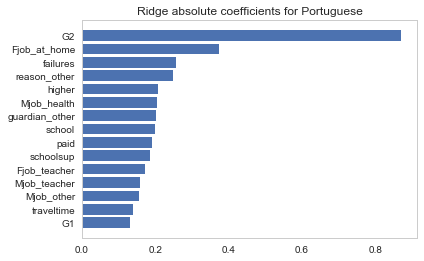

In [268]:
x = []
y = []
for i in range(15)[::-1]:
    x.append(ridge_coeffs[i][0])
    y.append(abs(ridge_coeffs[i][1]))
fig, ax = plt.subplots(1,1)
plt.barh(range(len(y)), y, align='center')
plt.title("Ridge absolute coefficients for Portuguese")
plt.yticks(range(len(y)), x)
ax.grid(False)
plt.savefig("Ridge_coefficients_port")

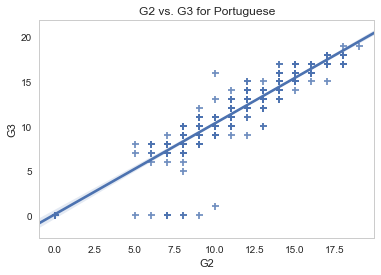

In [217]:
ax = sns.regplot(x="G2", y="G3", data=portTransformed, marker = '+')
ax.grid(False)
ax.set_title("G2 vs. G3 for Portuguese")

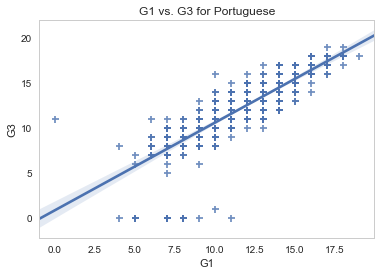

In [218]:
ax = sns.regplot(x="G1", y="G3", data=portTransformed, marker = '+')
ax.grid(False)
ax.set_title("G1 vs. G3 for Portuguese")

In [219]:
unregularized, ridge, lasso = runLinearRegression(portTransformed, ['G3'], ['G2', 'G1'])

In [220]:
print("FOR PORTUGUESE")
print("With just G1, G2: Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("With just G1, G2: Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))

FOR PORTUGUESE
With just G1, G2: Unregularized accuracy: 0.83 (+/- 0.19)
With just G1, G2: Unregularized accuracy: -1.63 (+/- 2.80)


Clearly, using previous grades is ideal.

###### WITHOUT GRADES

In [221]:
unregularized, ridge, lasso = runLinearRegression(portTransformed, targetColumn, featureColumnsNoGrades)

In [222]:
print("PORTUGUESE WITHOUT GRADES")
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))

PORTUGUESE WITHOUT GRADES
Unregularized accuracy: 0.12 (+/- 0.33)
Unregularized accuracy: -7.99 (+/- 11.24)
Ridge accuracy: 0.12 (+/- 0.00)
Ridge accuracy: -7.96 (+/- 0.00)
Lasso accuracy: -0.07 (+/- 0.25)
Lasso accuracy: -9.73 (+/- 2.22)


In [223]:
unregularized_coeffs = returnAttributesWithLargestCoefficients(portXNoGrades, portY, unregularized[0])
ridge_coeffs = returnAttributesWithLargestCoefficients(portXNoGrades, portY, ridge[0])

In [224]:
ridge_coeffs

[['higher', 1.7328765287361148],
 ['failures', -1.4120621054676321],
 ['schoolsup', -1.3109982195017345],
 ['school', -1.2001853539917173],
 ['Fjob_teacher', 0.85783472669252214],
 ['Mjob_health', 0.63821269028633831],
 ['sex', -0.63298676210997673],
 ['reason_other', -0.43990811185855311],
 ['romantic', -0.43150585026470323],
 ['studytime', 0.40666714833249296],
 ['paid', -0.37160241873688082],
 ['Fjob_services', -0.36511228282541186],
 ['Fjob_health', -0.33390891081718538],
 ['address', 0.32272416140131405],
 ['famsize', 0.30249743548262031],
 ['Fjob_at_home', 0.2781652440130899],
 ['Mjob_at_home', -0.26312860379398945],
 ['internet', 0.25289442333625328],
 ['guardian_other', 0.24909569889456928],
 ['Mjob_teacher', 0.24864828599819458],
 ['activities', 0.21912490014928773],
 ['nursery', -0.21601977807450273],
 ['reason_reputation', 0.21276411524796573],
 ['Mjob_other', -0.21273084881721113],
 ['Dalc', -0.20478231802135372],
 ['guardian_mother', -0.19428656994427515],
 ['health', -0.1

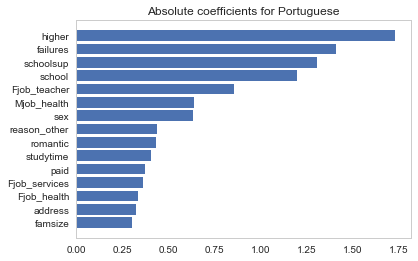

In [225]:
x = []
y = []
for i in range(15)[::-1]:
    x.append(ridge_coeffs[i][0])
    y.append(abs(ridge_coeffs[i][1]))
fig, ax = plt.subplots(1,1)
plt.barh(range(len(y)), y, align='center')
plt.title("Absolute coefficients for Portuguese")
plt.yticks(range(len(y)), x)
ax.grid(False)

###### Math

###### WITH GRADES

In [226]:
unregularized, ridge, lasso = runLinearRegression(mathTransformed, targetColumn, featureColumns)

In [227]:
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))

Unregularized accuracy: 0.78 (+/- 0.16)
Unregularized accuracy: -4.33 (+/- 4.30)
Ridge accuracy: 0.78 (+/- 0.00)
Ridge accuracy: -4.31 (+/- 0.00)
Lasso accuracy: 0.76 (+/- 0.09)
Lasso accuracy: -4.92 (+/- 1.93)


In [228]:
unregularized_coeffs = returnAttributesWithLargestCoefficients(mathX, mathY, unregularized[0])
ridge_coeffs = returnAttributesWithLargestCoefficients(mathX, mathY, ridge[0])

In [229]:
ridge_coeffs

[['G2', 0.95697494216231316],
 ['school', 0.48067859180334116],
 ['Fjob_health', 0.46059250958335068],
 ['schoolsup', 0.45656154604485027],
 ['famrel', 0.35677335806260868],
 ['activities', -0.3459828358685586],
 ['reason_other', 0.29522896725798131],
 ['romantic', -0.27220670882275505],
 ['higher', 0.22589743598688172],
 ['nursery', -0.22268623847465085],
 ['reason_home', -0.22165995405143152],
 ['Fjob_services', -0.19230307838025448],
 ['G1', 0.18915999921614898],
 ['Dalc', -0.18494463030526107],
 ['famsup', 0.1768283521347262],
 ['Walc', 0.17675062916400994],
 ['sex', 0.17442411572728347],
 ['age', -0.17331231647888332],
 ['Mjob_health', -0.16126974419516302],
 ['failures', -0.16059873613053549],
 ['internet', -0.14429961794684046],
 ['Fedu', -0.13392959817906941],
 ['Medu', 0.12970163711405563],
 ['Fjob_at_home', 0.12942649442757442],
 ['Pstatus', -0.12782047983191153],
 ['reason_reputation', 0.11656294110541268],
 ['studytime', -0.10474078517229632],
 ['guardian_mother', 0.1045901

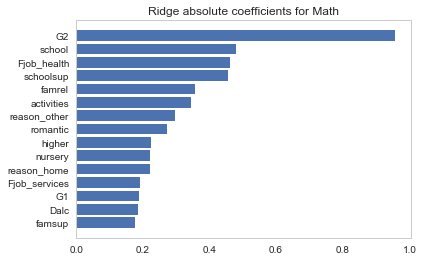

In [230]:
x = []
y = []
for i in range(15)[::-1]:
    x.append(ridge_coeffs[i][0])
    y.append(abs(ridge_coeffs[i][1]))
fig, ax = plt.subplots(1,1)
plt.barh(range(len(y)), y, align='center')
plt.title("Ridge absolute coefficients for Math")
plt.yticks(range(len(y)), x)
ax.grid(False)

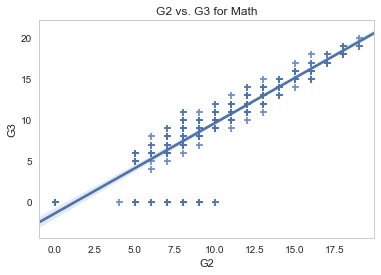

In [231]:
ax = sns.regplot(x="G2", y="G3", data=mathTransformed, marker = '+')
ax.grid(False)
ax.set_title("G2 vs. G3 for Math")

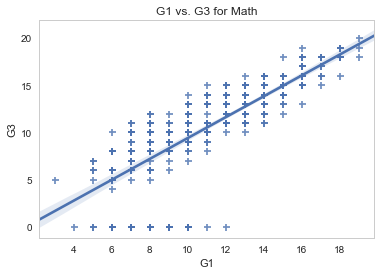

In [232]:
ax = sns.regplot(x="G1", y="G3", data=mathTransformed, marker = '+')
ax.grid(False)
ax.set_title("G1 vs. G3 for Math")

In [233]:
unregularized, ridge, lasso = runLinearRegression(mathTransformed, ['G3'], ['G2', 'G1'])

In [234]:
print("FOR MATH")
print("With just G1, G2: Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("With just G1, G2: Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))

FOR MATH
With just G1, G2: Unregularized accuracy: 0.81 (+/- 0.18)
With just G1, G2: Unregularized accuracy: -3.82 (+/- 4.92)


Clearly, using previous grades is ideal.

###### WITHOUT GRADES

In [269]:
unregularized, ridge, lasso = runLinearRegression(mathTransformed, targetColumn, featureColumnsNoGrades)

In [270]:
print("MATH WITHOUT GRADES")
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[1].mean(), unregularized[1].std() * 2))
print("Unregularized accuracy: %0.2f (+/- %0.2f)" % (unregularized[2].mean(), unregularized[2].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[1].mean(), ridge[1].std() * 2))
print("Ridge accuracy: %0.2f (+/- %0.2f)" % (ridge[2].mean(), ridge[2].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[1].mean(), lasso[1].std() * 2))
print("Lasso accuracy: %0.2f (+/- %0.2f)" % (lasso[2].mean(), lasso[2].std() * 2))

MATH WITHOUT GRADES
Unregularized accuracy: -0.00 (+/- 0.27)
Unregularized accuracy: -19.93 (+/- 16.53)
Ridge accuracy: -0.00 (+/- 0.00)
Ridge accuracy: -19.91 (+/- 0.00)
Lasso accuracy: -0.01 (+/- 0.09)
Lasso accuracy: -19.85 (+/- 1.59)


In [237]:
unregularized_coeffs = returnAttributesWithLargestCoefficients(mathXNoGrades, mathY, unregularized[0])
ridge_coeffs = returnAttributesWithLargestCoefficients(mathXNoGrades, mathY, ridge[0])

In [238]:
ridge_coeffs

[['failures', -1.7237843879874786],
 ['Fjob_teacher', 1.5592305629043615],
 ['higher', 1.3704919551464967],
 ['schoolsup', -1.3504358528570712],
 ['sex', 1.2621970820858204],
 ['Mjob_teacher', -1.1979540772492012],
 ['romantic', -1.0943606326722355],
 ['Mjob_health', 1.0412454359619634],
 ['famsup', -0.8617372257798025],
 ['school', 0.72529799562643271],
 ['famsize', 0.70273245348276303],
 ['Mjob_services', 0.70141560725574459],
 ['guardian_other', 0.5972834123458195],
 ['goout', -0.59356935621193829],
 ['Fjob_health', 0.58088568446694688],
 ['address', 0.55129698501282076],
 ['studytime', 0.54942704743234794],
 ['internet', 0.49807794063035826],
 ['reason_other', 0.49589163168434763],
 ['Medu', 0.45671986243619839],
 ['Fjob_other', -0.38617731711257108],
 ['age', -0.37508400824481636],
 ['paid', 0.33973035277571406],
 ['reason_reputation', 0.33183758101388594],
 ['activities', -0.32948743342620462],
 ['Pstatus', -0.32014695646196939],
 ['Mjob_other', -0.31588375657840595],
 ['freetime

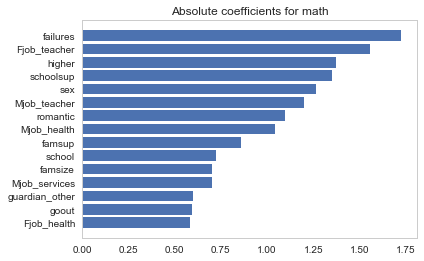

In [239]:
x = []
y = []
for i in range(15)[::-1]:
    x.append(ridge_coeffs[i][0])
    y.append(abs(ridge_coeffs[i][1]))
fig, ax = plt.subplots(1,1)
plt.barh(range(len(y)), y, align='center')
plt.title("Absolute coefficients for math")
plt.yticks(range(len(y)), x)
ax.grid(False)

In [240]:
#########################################################################################################################

#### Let's now do SVM

In [241]:
from sklearn.svm import SVR

In [242]:
def SVM(originalDf, targetColumn, featureColumns):
    '''
    Runs ridge regularized linear regression and returns the 
    mean and standard deviation of test scores
    '''
    parameters = {'C' : np.arange(0.1, 10, .5)}
    test_scores = []
    X = originalDf[featureColumns]
    y = np.ravel(originalDf[targetColumn])
    svr = SVR()
    scoringMethods = ['r2','neg_mean_squared_error']
    for score in scoringMethods:
        clf = GridSearchCV(svr, parameters, cv=10, scoring=score)
        clf.fit(X,y)
        test_scores.append(clf.cv_results_['mean_test_score'])
    return clf.best_estimator_, test_scores

In [243]:
######################## WITH GRADES ###############################

###### Portuguese 


###### WITH GRADES

In [244]:
results = SVM(portTransformed, targetColumn, featureColumns)[1]
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[0].mean(), results[0].std() * 2))
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[1].mean(), results[1].std() * 2))

SVM accuracy: 0.74 (+/- 0.10)
SVM accuracy: -2.50 (+/- 1.21)


Clearly, using previous grades is ideal.

###### WITHOUT GRADES

In [272]:
results = SVM(portTransformed, targetColumn, featureColumnsNoGrades)[1]
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[0].mean(), results[0].std() * 2))
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[1].mean(), results[1].std() * 2))

SVM accuracy: 0.06 (+/- 0.05)
SVM accuracy: -8.42 (+/- 0.50)


In [275]:
results = SVM(portTransformed, targetColumn, featureColumnsNoGrades)[0]

###### Math


###### WITH GRADES

In [277]:
results = SVM(mathTransformed, targetColumn, featureColumns)[1]
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[0].mean(), results[0].std() * 2))
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[1].mean(), results[1].std() * 2))

SVM accuracy: 0.78 (+/- 0.20)
SVM accuracy: -4.49 (+/- 4.43)


Clearly, using previous grades is ideal.

###### WITHOUT GRADES

In [278]:
results = SVM(mathTransformed, targetColumn, featureColumnsNoGrades)[1]
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[0].mean(), results[0].std() * 2))
print("SVM accuracy: %0.2f (+/- %0.2f)" % (results[1].mean(), results[1].std() * 2))

SVM accuracy: 0.06 (+/- 0.05)
SVM accuracy: -18.60 (+/- 1.25)
